In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [28]:
final_df = pd.read_csv(r'C:\Users\vishw\Desktop\DATASET\Cleaned_final_dataset.csv')

In [29]:
final_df

,Region,Year,Electricity_Access_Percentage,Area_Type,Financial_Flows_Clean_Energy_USD,Renewable_Technology_Type,Renewable_Capacity_Per_Capita_Watts,Renewable_Share_in_TFEC_Percentage
0,China,2010,99.7,Allarea,143.76,ALL,173.01473,12.26
1,China,2010,99.4,Rural,143.76,ALL,173.01473,12.26
2,China,2010,100.0,Urban,143.76,ALL,173.01473,12.26
3,China,2010,99.7,Allarea,71.17,BIOENERGY,2.55631,12.26
4,China,2010,99.4,Rural,71.17,BIOENERGY,2.55631,12.26
...,...,...,...,...,...,...,...,...
2803,World,2022,97.7,Urban,5333.07,SOLAR,133.15360,18.71
2804,World,2022,84.0,Rural,5333.07,SOLAR,133.15360,18.71
2805,World,2022,91.4,Allarea,1691.42,WIND,112.73321,18.71
2806,World,2022,97.7,Urban,1691.42,WIND,112.73321,18.71


# 1. CORRELATION

Pearson Correlation Matrix:
                                     Financial_Flows_Clean_Energy_USD  \
Financial_Flows_Clean_Energy_USD                             1.000000   
Electricity_Access_Percentage                                0.209236   
Renewable_Capacity_Per_Capita_Watts                          0.085215   

                                     Electricity_Access_Percentage  \
Financial_Flows_Clean_Energy_USD                          0.209236   
Electricity_Access_Percentage                             1.000000   
Renewable_Capacity_Per_Capita_Watts                       0.969214   

                                     Renewable_Capacity_Per_Capita_Watts  
Financial_Flows_Clean_Energy_USD                                0.085215  
Electricity_Access_Percentage                                   0.969214  
Renewable_Capacity_Per_Capita_Watts                             1.000000  

Spearman Correlation Matrix:
                                     Financial_Flows_Clean_Energy_US

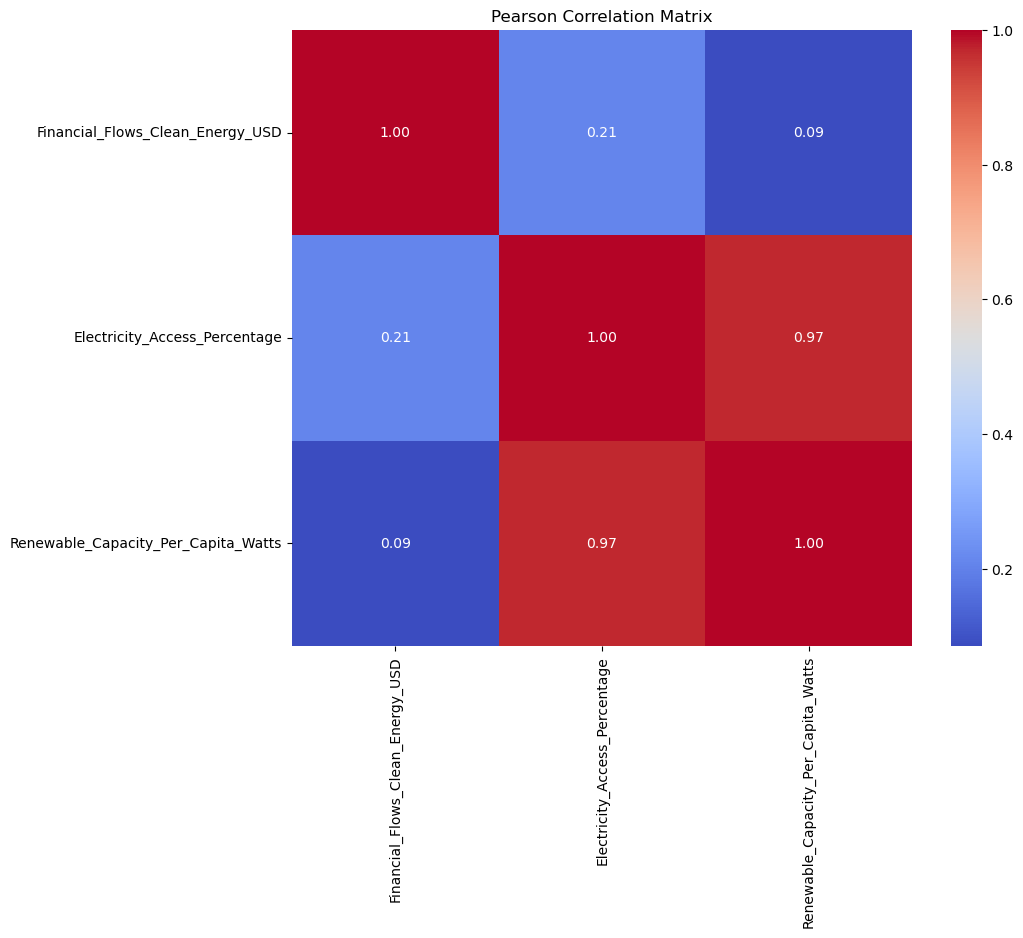

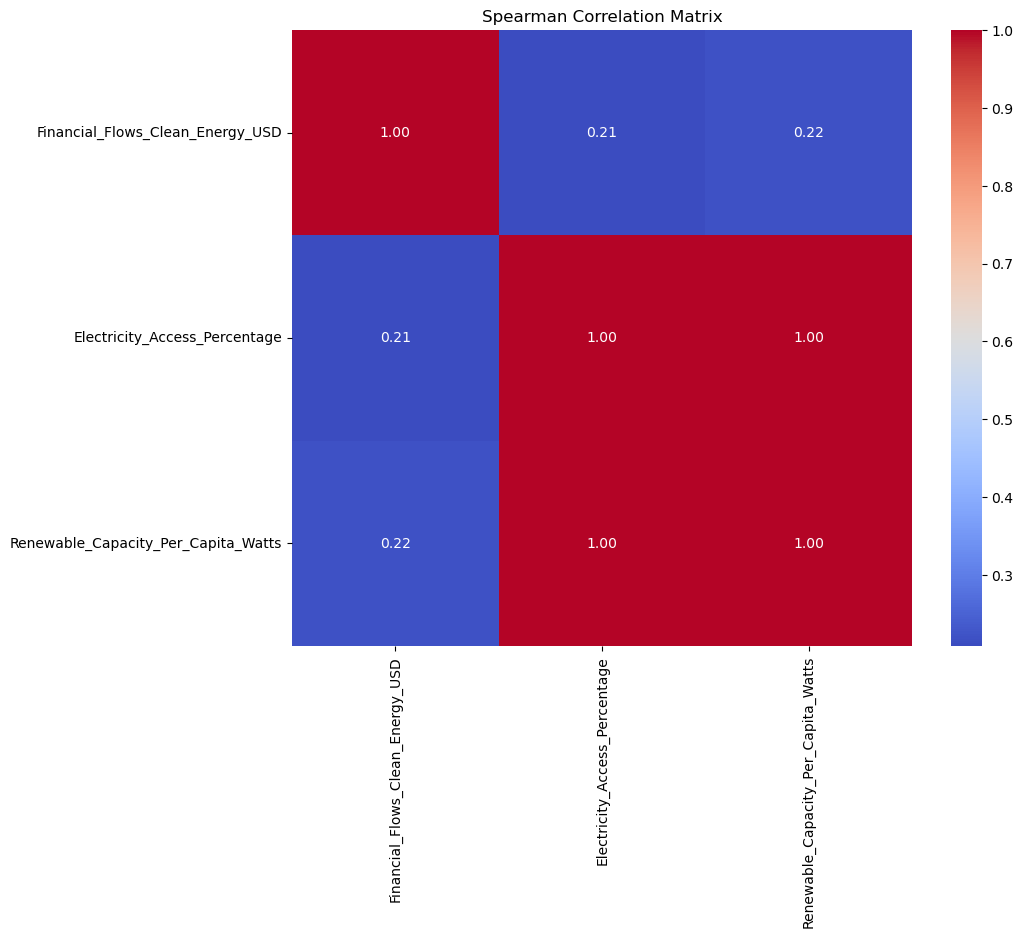

In [30]:
# Filter the data for 'ALL' renewable technology type
filtered_data = final_df[(final_df["Renewable_Technology_Type"] == "ALL") & (final_df['Region'] == 'World') & (final_df['Area_Type'] == 'Allarea')]

# Select relevant columns and drop NaN values
correlation_data = filtered_data[[
    "Financial_Flows_Clean_Energy_USD",
    "Electricity_Access_Percentage",
    "Renewable_Capacity_Per_Capita_Watts"
]]

# Calculate Pearson and Spearman correlations
pearson_corr = correlation_data.corr(method="pearson")
spearman_corr = correlation_data.corr(method="spearman")

# Display correlations
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Heatmap for Pearson correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Heatmap for Spearman correlation
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
# Load the dataset
file_path = "/mnt/data/Cleaned_final_dataset.csv"
df = pd.read_csv(r'C:\Users\vishw\Desktop\DATASET\Cleaned_final_dataset.csv')

# Convert 'Year' to datetime format for time-series analysis
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df["Year"] = df["Year"].dt.year  # Keeping it numeric


In [33]:
def run_regression(df_filtered, case_name):
    """
    Runs linear regression on the given dataset and prints the results.
    Assesses the impact of Renewable Capacity and Financial Flows on Electricity Access.
    """
    # Selecting relevant columns
    regression_data = df_filtered[[
        "Electricity_Access_Percentage",
        "Renewable_Capacity_Per_Capita_Watts",
        "Financial_Flows_Clean_Energy_USD"
    ]].dropna()

    # Independent variables (Predictors)
    X = regression_data[["Renewable_Capacity_Per_Capita_Watts", "Financial_Flows_Clean_Energy_USD"]]
    
    # Dependent variable (Target)
    y = regression_data["Electricity_Access_Percentage"]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Run regression model
    model = sm.OLS(y, X).fit()

    # Print results
    print(f"\nRegression Analysis for {case_name}")
    print(model.summary())

    return model


In [34]:
# 1️⃣ World Only
df_world = df[(df["Region"] == "World") & (df["Renewable_Technology_Type"] == "ALL") & (df["Area_Type"] == "Allarea")]
run_regression(df_world, "World")

# # 2️⃣ Regional Level (Exclude World, India, China)
# df_regions = df[
#     (df["Renewable_Technology_Type"] == "ALL") & 
#     (df["Area_Type"] == "Allarea") & 
#     (~df["Region"].isin(["World", "India", "China"]))
# ]
# run_regression(df_regions, "All Regions (Excluding World, India, China)")

# # 3️⃣ India & China Only
# df_india_china = df[
#     (df["Region"].isin(["India", "China"])) & 
#     (df["Renewable_Technology_Type"] == "ALL") & 
#     (df["Area_Type"] == "Allarea")
# ]
# run_regression(df_india_china, "India and China")



Regression Analysis for World
                                  OLS Regression Results                                 
Dep. Variable:     Electricity_Access_Percentage   R-squared:                       0.956
Model:                                       OLS   Adj. R-squared:                  0.947
Method:                            Least Squares   F-statistic:                     107.4
Date:                           Sat, 22 Feb 2025   Prob (F-statistic):           1.74e-07
Time:                                   11:44:20   Log-Likelihood:                -10.556
No. Observations:                             13   AIC:                             27.11
Df Residuals:                                 10   BIC:                             28.81
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                                          coef    std err          t 


Correlation Matrix for World:
                                     Renewable_Capacity_Per_Capita_Watts  \
Renewable_Capacity_Per_Capita_Watts                             1.000000   
Financial_Flows_Clean_Energy_USD                                0.085215   

                                     Financial_Flows_Clean_Energy_USD  
Renewable_Capacity_Per_Capita_Watts                          0.085215  
Financial_Flows_Clean_Energy_USD                             1.000000  


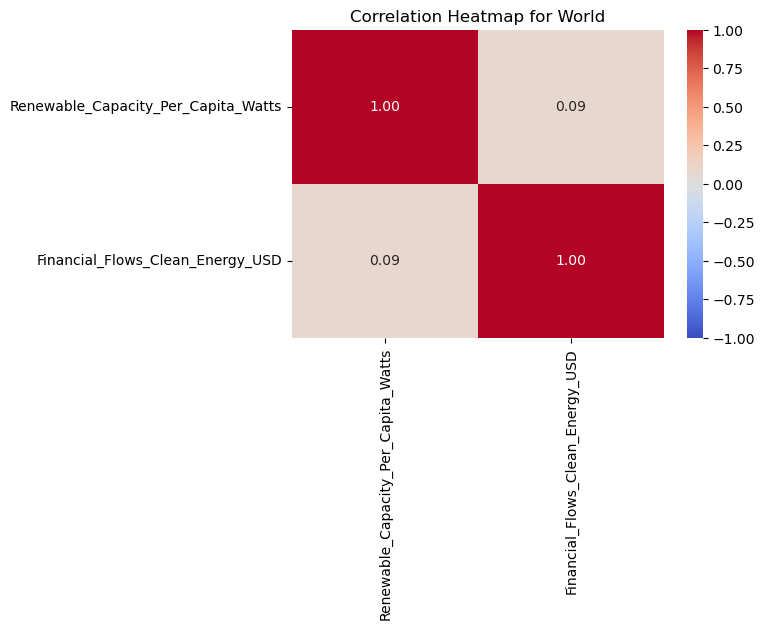

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for different cases
df_world = df[
    (df["Region"] == "World") & 
    (df["Renewable_Technology_Type"] == "ALL") & 
    (df["Area_Type"] == "Allarea")
]


# Function to compute correlation matrix and visualize heatmap
def check_multicollinearity(df_filtered, case_name):
    """
    Computes and visualizes the correlation matrix for checking multicollinearity.
    """
    correlation_matrix = df_filtered[[
        "Renewable_Capacity_Per_Capita_Watts",
        "Financial_Flows_Clean_Energy_USD"
    ]].corr()

    print(f"\nCorrelation Matrix for {case_name}:")
    print(correlation_matrix)

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap for {case_name}")
    plt.show()

# Check for World data
check_multicollinearity(df_world, "World")




# VIF TEst

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting relevant independent variables for VIF calculation
X = df_world[["Renewable_Capacity_Per_Capita_Watts", "Financial_Flows_Clean_Energy_USD"]]

# Adding a constant to the model (as required for VIF calculation)
X = sm.add_constant(X)

# Calculating VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


                              Variable        VIF
0                                const  21.957431
1  Renewable_Capacity_Per_Capita_Watts   1.007315
2     Financial_Flows_Clean_Energy_USD   1.007315


A relation between disparity and renewable share in TFEC. so that we can say that ok with increasing RE share in TFEC we saw reductions in disparity. 

In [15]:
df

,Region,Year,Electricity_Access_Percentage,Area_Type,Financial_Flows_Clean_Energy_USD,Renewable_Technology_Type,Renewable_Capacity_Per_Capita_Watts,Renewable_Share_in_TFEC_Percentage
0,China,2010,99.7,Allarea,143.76,ALL,173.01473,12.26
1,China,2010,99.4,Rural,143.76,ALL,173.01473,12.26
2,China,2010,100.0,Urban,143.76,ALL,173.01473,12.26
3,China,2010,99.7,Allarea,71.17,BIOENERGY,2.55631,12.26
4,China,2010,99.4,Rural,71.17,BIOENERGY,2.55631,12.26
...,...,...,...,...,...,...,...,...
2803,World,2022,97.7,Urban,5333.07,SOLAR,133.15360,18.71
2804,World,2022,84.0,Rural,5333.07,SOLAR,133.15360,18.71
2805,World,2022,91.4,Allarea,1691.42,WIND,112.73321,18.71
2806,World,2022,97.7,Urban,1691.42,WIND,112.73321,18.71


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Function to compute disparity and merge with Renewable Share in TFEC
def prepare_disparity_data(df_filtered, case_name):
    """
    Computes urban-rural electricity disparity and merges it with Renewable Share in TFEC.
    """
    # Pivot table for Urban and Rural electricity access
    disparity_data = df_filtered.pivot_table(
        index=["Year", "Region"],
        columns="Area_Type",
        values="Electricity_Access_Percentage"
    ).reset_index()

    # Calculate Disparity
    disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

    # Merge with Renewable Share in TFEC
    merged_data = disparity_data.merge(
        df_filtered[["Year", "Region", "Renewable_Share_in_TFEC_Percentage"]],
        on=["Year", "Region"],
        how="left"
    ).drop_duplicates()

    print(f"\nPrepared dataset for {case_name}:")
    print(merged_data.head())

    return merged_data

# 1️⃣ World-Only Data
df_world = df[
    (df["Region"] == "World") & 
    (df["Renewable_Technology_Type"] == "ALL")
]
disparity_world = prepare_disparity_data(df_world, "World")




Prepared dataset for World:
    Year Region  Allarea  Rural  Urban  Disparity  \
0   2010  World     83.6   72.9   95.9       23.0   
3   2011  World     84.6   74.3   96.4       22.1   
6   2012  World     85.1   74.9   96.5       21.6   
9   2013  World     85.8   76.0   96.5       20.5   
12  2014  World     86.3   76.3   96.6       20.3   

    Renewable_Share_in_TFEC_Percentage  
0                                16.04  
3                                16.01  
6                                16.27  
9                                16.52  
12                               16.66  


In [17]:
# Function to run OLS regression
def run_disparity_regression(df_disparity, case_name):
    """
    Runs a regression model to analyze the effect of Renewable Share in TFEC on Electricity Disparity.
    """
    # Drop NaN values
    regression_data = df_disparity[["Disparity", "Renewable_Share_in_TFEC_Percentage"]].dropna()

    # Independent variable (Predictor)
    X = regression_data[["Renewable_Share_in_TFEC_Percentage"]]

    # Dependent variable (Target)
    y = regression_data["Disparity"]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Run regression model
    model = sm.OLS(y, X).fit()

    print(f"\nRegression Analysis for {case_name} (Disparity vs Renewable Share in TFEC)")
    print(model.summary())

    return model

# Apply OLS regression for each case
model_world = run_disparity_regression(disparity_world, "World")



Regression Analysis for World (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     59.54
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           9.19e-06
Time:                        10:09:44   Log-Likelihood:                -22.117
No. Observations:                  13   AIC:                             48.23
Df Residuals:                      11   BIC:                             49.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

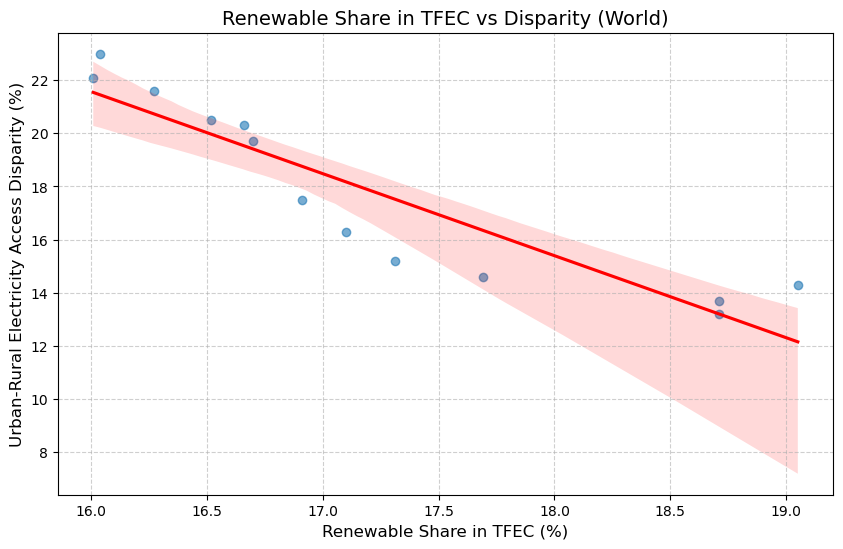

In [18]:
# Function to visualize the relationship
def plot_disparity_vs_RE(df_disparity, case_name):
    """
    Creates a scatter plot to visualize the relationship between Renewable Share in TFEC and Disparity.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=df_disparity, 
        x="Renewable_Share_in_TFEC_Percentage", 
        y="Disparity", 
        scatter_kws={"alpha":0.6}, 
        line_kws={"color": "red"}
    )
    
    plt.title(f"Renewable Share in TFEC vs Disparity ({case_name})", fontsize=14)
    plt.xlabel("Renewable Share in TFEC (%)", fontsize=12)
    plt.ylabel("Urban-Rural Electricity Access Disparity (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    plt.show()

# Visualize for each case
plot_disparity_vs_RE(disparity_world, "World")


In [19]:
def prepare_disparity_data(df_filtered, case_name):
    """
    Computes urban-rural electricity disparity and merges it with Renewable Share in TFEC.
    """
    # Pivot table for Urban and Rural electricity access
    disparity_data = df_filtered.pivot_table(
        index=["Year", "Region"],
        columns="Area_Type",
        values="Electricity_Access_Percentage"
    ).reset_index()

    # Calculate Disparity (Urban - Rural)
    disparity_data["Disparity"] = disparity_data["Urban"] - disparity_data["Rural"]

    # Merge with Renewable Share in TFEC
    merged_data = disparity_data.merge(
        df_filtered[["Year", "Region", "Renewable_Share_in_TFEC_Percentage"]],
        on=["Year", "Region"],
        how="left"
    ).drop_duplicates()

    print(f"\nPrepared dataset for {case_name}:")
    print(merged_data.head())

    return merged_data


In [20]:
def run_disparity_regression(df_disparity, case_name):
    """
    Runs a regression model to analyze the effect of Renewable Share in TFEC on Electricity Disparity.
    """
    # Drop NaN values
    regression_data = df_disparity[["Disparity", "Renewable_Share_in_TFEC_Percentage"]].dropna()

    # Independent variable (Predictor)
    X = regression_data[["Renewable_Share_in_TFEC_Percentage"]]

    # Dependent variable (Target)
    y = regression_data["Disparity"]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Run regression model
    model = sm.OLS(y, X).fit()

    print(f"\nRegression Analysis for {case_name} (Disparity vs Renewable Share in TFEC)")
    print(model.summary())

    return model


In [21]:
def plot_disparity_vs_RE(df_disparity, case_name):
    """
    Creates a scatter plot to visualize the relationship between Renewable Share in TFEC and Disparity.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=df_disparity, 
        x="Renewable_Share_in_TFEC_Percentage", 
        y="Disparity", 
        scatter_kws={"alpha":0.6}, 
        line_kws={"color": "red"}
    )
    
    plt.title(f"Renewable Share in TFEC vs Disparity ({case_name})", fontsize=14)
    plt.xlabel("Renewable Share in TFEC (%)", fontsize=12)
    plt.ylabel("Urban-Rural Electricity Access Disparity (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    plt.show()



--- Analyzing Eastern Asia ---

Prepared dataset for Eastern Asia:
    Year        Region  Allarea  Rural  Urban  Disparity  \
0   2010  Eastern Asia     98.6   99.4  100.0        0.6   
3   2011  Eastern Asia     98.8   99.7  100.0        0.3   
6   2012  Eastern Asia     98.9   99.8  100.0        0.2   
9   2013  Eastern Asia     98.9   99.9  100.0        0.1   
12  2014  Eastern Asia     99.0   99.9  100.0        0.1   

    Renewable_Share_in_TFEC_Percentage  
0                                10.50  
3                                 9.88  
6                                10.10  
9                                10.15  
12                               10.68  

Regression Analysis for Eastern Asia (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.309
Method:    

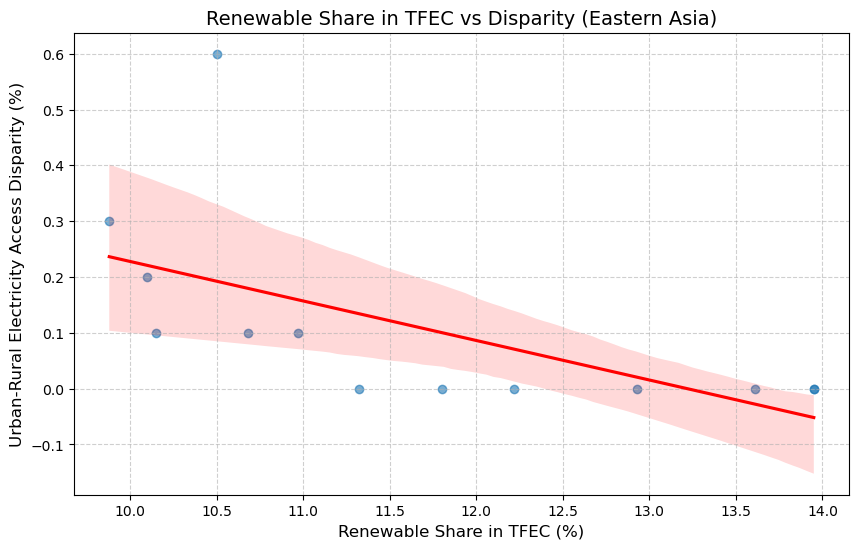


--- Analyzing Europe ---

Prepared dataset for Europe:
    Year  Region  Allarea  Rural  Urban  Disparity  \
0   2010  Europe     99.6   99.5   99.7        0.2   
3   2011  Europe     99.6   99.5   99.7        0.2   
6   2012  Europe     99.8   99.6   99.9        0.3   
9   2013  Europe     99.8   99.6   99.9        0.3   
12  2014  Europe     99.9   99.7   99.9        0.2   

    Renewable_Share_in_TFEC_Percentage  
0                                10.98  
3                                10.94  
6                                11.90  
9                                12.56  
12                               12.82  

Regression Analysis for Europe (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:             

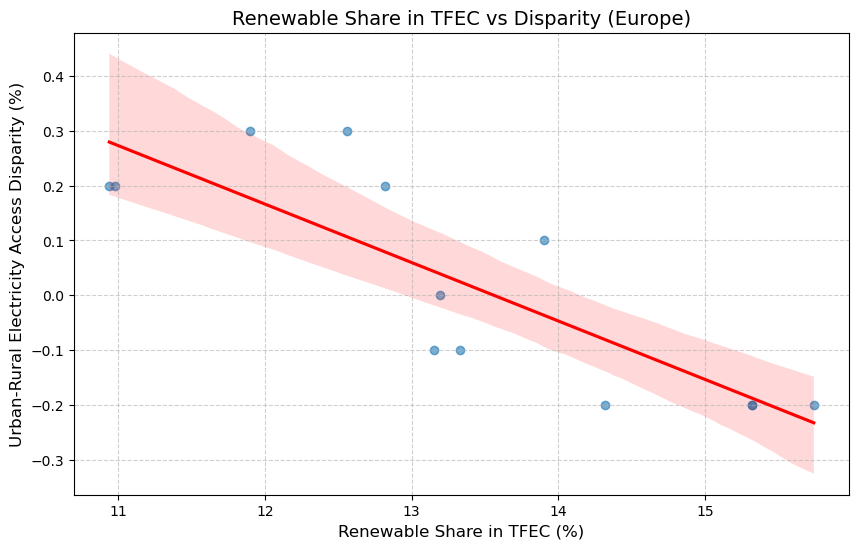


--- Analyzing South-Eastern Asia ---

Prepared dataset for South-Eastern Asia:
    Year              Region  Allarea  Rural  Urban  Disparity  \
0   2010  South-Eastern Asia     88.6   81.3   97.8       16.5   
3   2011  South-Eastern Asia     89.9   83.3   98.0       14.7   
6   2012  South-Eastern Asia     90.5   84.3   98.0       13.7   
9   2013  South-Eastern Asia     91.2   85.2   98.3       13.1   
12  2014  South-Eastern Asia     91.7   85.9   98.4       12.5   

    Renewable_Share_in_TFEC_Percentage  
0                                30.58  
3                                29.72  
6                                28.92  
9                                28.61  
12                               28.08  

Regression Analysis for South-Eastern Asia (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.937
Model:                            OL

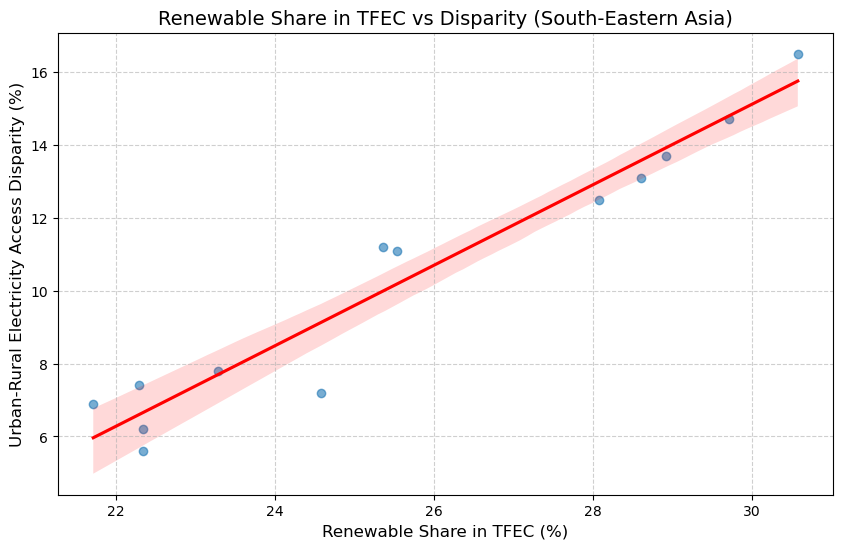


--- Analyzing Southern Asia ---

Prepared dataset for Southern Asia:
    Year         Region  Allarea  Rural  Urban  Disparity  \
0   2010  Southern Asia     76.2   67.3   94.4       27.1   
3   2011  Southern Asia     78.9   70.8   95.5       24.7   
6   2012  Southern Asia     80.3   72.4   96.1       23.7   
9   2013  Southern Asia     82.5   75.4   96.2       20.8   
12  2014  Southern Asia     84.6   78.2   97.0       18.8   

    Renewable_Share_in_TFEC_Percentage  
0                                30.99  
3                                30.15  
6                                29.98  
9                                30.16  
12                               29.31  

Regression Analysis for Southern Asia (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.392
Me

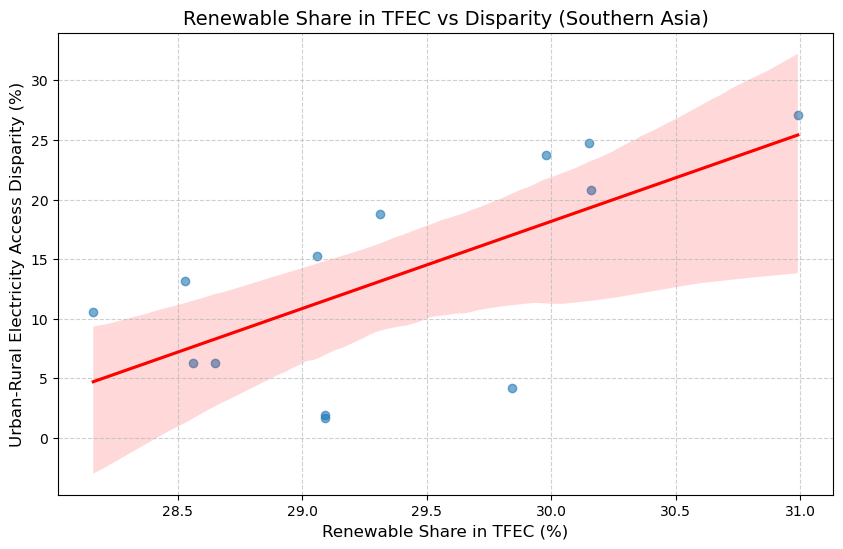


--- Analyzing Sub-Saharan Africa ---

Prepared dataset for Sub-Saharan Africa:
    Year              Region  Allarea  Rural  Urban  Disparity  \
0   2010  Sub-Saharan Africa     33.2   16.8   68.0       51.2   
3   2011  Sub-Saharan Africa     35.7   18.5   72.1       53.6   
6   2012  Sub-Saharan Africa     36.6   19.0   72.2       53.2   
9   2013  Sub-Saharan Africa     37.7   20.3   72.3       52.0   
12  2014  Sub-Saharan Africa     38.0   19.1   72.3       53.2   

    Renewable_Share_in_TFEC_Percentage  
0                                70.88  
3                                70.30  
6                                69.15  
9                                68.03  
12                               67.85  

Regression Analysis for Sub-Saharan Africa (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.009
Model:                            OL

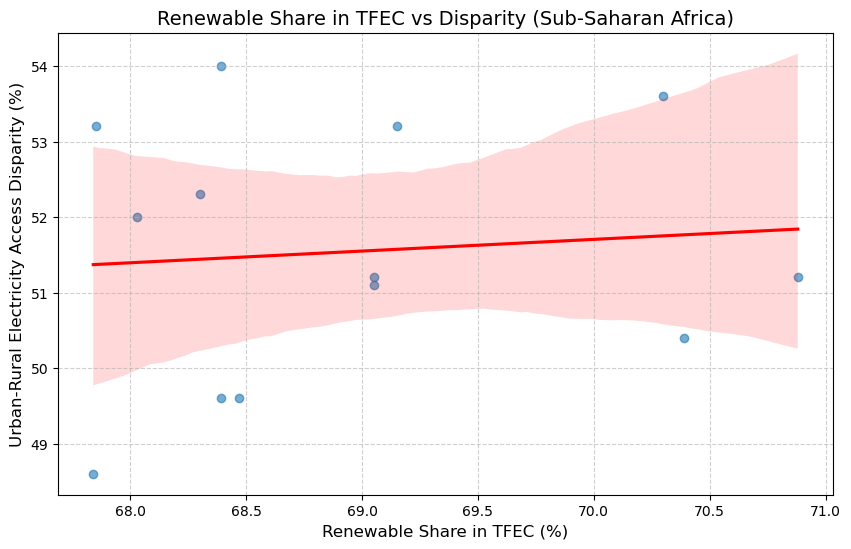


--- Analyzing Western Asia ---

Prepared dataset for Western Asia:
    Year        Region  Allarea  Rural  Urban  Disparity  \
0   2010  Western Asia     95.0   84.4   99.9       15.5   
3   2011  Western Asia     94.9   84.0  100.0       16.0   
6   2012  Western Asia     94.0   81.0   99.9       18.9   
9   2013  Western Asia     96.4   88.6   99.9       11.3   
12  2014  Western Asia     95.5   85.6   99.8       14.2   

    Renewable_Share_in_TFEC_Percentage  
0                                 4.48  
3                                 4.07  
6                                 3.87  
9                                 4.06  
12                                3.44  

Regression Analysis for Western Asia (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.045
Method:    

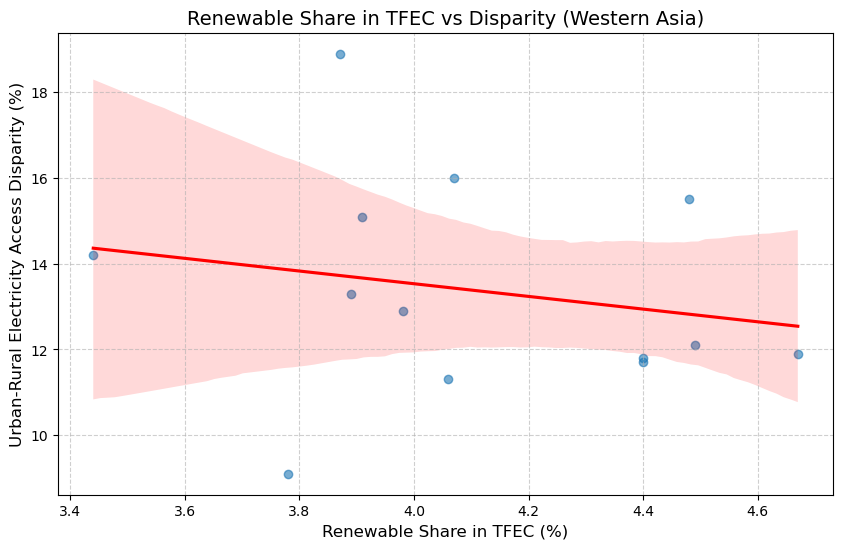


Prepared dataset for India:
    Year Region  Allarea  Rural  Urban  Disparity  \
0   2010  India     76.3   68.4   94.0       25.6   
3   2011  India     79.5   72.3   95.4       23.1   
6   2012  India     79.9   72.4   96.1       23.7   
9   2013  India     83.1   76.8   96.6       19.8   
12  2014  India     85.1   79.4   97.1       17.7   

    Renewable_Share_in_TFEC_Percentage  
0                                36.18  
3                                35.03  
6                                34.76  
9                                34.86  
12                               33.85  

Regression Analysis for India (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.4930
Date:               

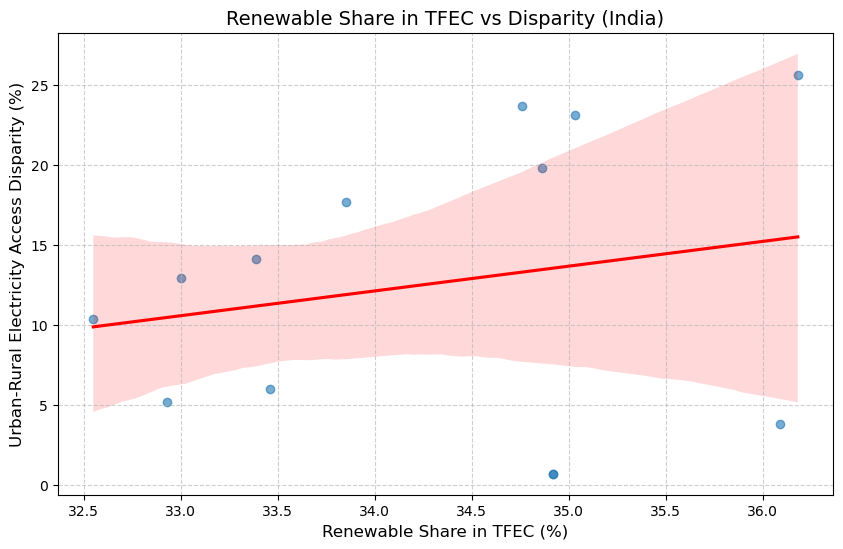


Prepared dataset for China:
    Year Region  Allarea  Rural  Urban  Disparity  \
0   2010  China     99.7   99.4  100.0        0.6   
3   2011  China     99.9   99.8  100.0        0.2   
6   2012  China     99.9   99.9  100.0        0.1   
9   2013  China    100.0  100.0  100.0        0.0   
12  2014  China    100.0  100.0  100.0        0.0   

    Renewable_Share_in_TFEC_Percentage  
0                                12.26  
3                                11.34  
6                                11.53  
9                                11.47  
12                               11.91  

Regression Analysis for China (Disparity vs Renewable Share in TFEC)
                            OLS Regression Results                            
Dep. Variable:              Disparity   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.291
Date:               

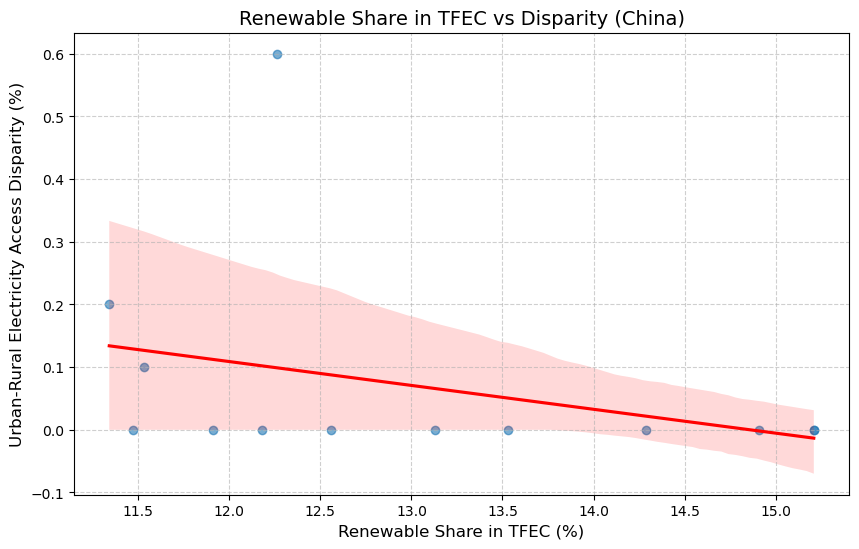

In [22]:
# Get unique regions (excluding 'World')
regions = df["Region"].unique()
regions = [r for r in regions if r not in ["World", "India", "China"]]

# Run analysis for each region
for region in regions:
    print(f"\n--- Analyzing {region} ---")
    
    # Filter data for the region
    df_region = df[
        (df["Region"] == region) & 
        (df["Renewable_Technology_Type"] == "ALL")
    ]
    
    # Compute disparity
    disparity_region = prepare_disparity_data(df_region, region)
    
    # Run regression
    run_disparity_regression(disparity_region, region)
    
    # Plot relationship
    plot_disparity_vs_RE(disparity_region, region)

# Run the same process for India
df_india = df[
    (df["Region"] == "India") & 
    (df["Renewable_Technology_Type"] == "ALL")
]
disparity_india = prepare_disparity_data(df_india, "India")
run_disparity_regression(disparity_india, "India")
plot_disparity_vs_RE(disparity_india, "India")

# Run the same process for China
df_china = df[
    (df["Region"] == "China") & 
    (df["Renewable_Technology_Type"] == "ALL")
]
disparity_china = prepare_disparity_data(df_china, "China")
run_disparity_regression(disparity_china, "China")
plot_disparity_vs_RE(disparity_china, "China")


In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the data
# Filter the required columns for calculating VIF
vif_data = disparity_world[[
    "Renewable_Share_in_TFEC_Percentage",
    "Disparity"
]].dropna()  # Remove NaN values

# Add a constant column for intercept
vif_data = sm.add_constant(vif_data)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display the VIF values
print(vif)


                             Variable          VIF
0                               const  3165.657174
1  Renewable_Share_in_TFEC_Percentage     6.413076
2                           Disparity     6.413076



Correlation Matrix:
                                    Disparity  \
Disparity                            1.000000   
Renewable_Share_in_TFEC_Percentage  -0.918732   

                                    Renewable_Share_in_TFEC_Percentage  
Disparity                                                    -0.918732  
Renewable_Share_in_TFEC_Percentage                            1.000000  


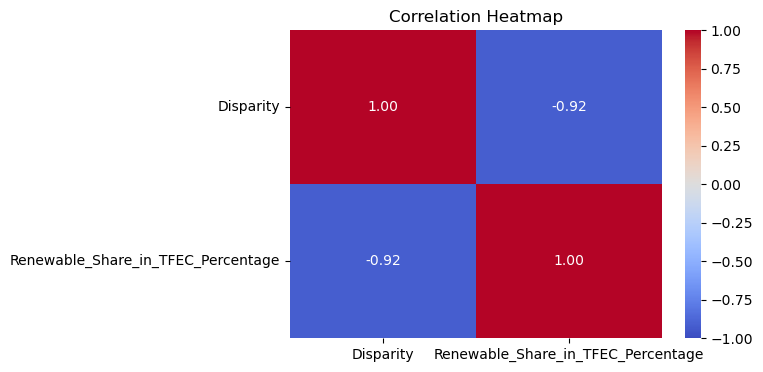

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter your data for World (or specific region, adjust as needed)
correlation_data = disparity_world[["Disparity", "Renewable_Share_in_TFEC_Percentage"]].dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
